# 13장. 과적합 피하기

머신러닝을 하는 사람이라면 과적합 문제를 반드시 극복해야 함

<hr>

## 1. 데이터의 확인과 실행

In [1]:
import pandas as pd
df=pd.read_csv('/content/sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [2]:
print(df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [7]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [41]:
# 데이터 입력
df=pd.read_csv('/content/sonar.csv', header=None)

dataset=df.values
X=dataset[:,0:60].astype(float)
Y_obj=dataset[:,60]

In [9]:
# 문자열 변환
e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [10]:
# 모델 설정
model=Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
# 모델 실행
model.fit(X,Y,epochs=20,batch_size=5) # 기존 epochs=200

# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))

Epoch 1/20
42/42 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.8221
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.8413
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.8173
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.8606
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8702
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.8750
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.8750
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.8702
Epoch 9/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.8990
Epoch 10/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.8654
Epoch 11/20
42/42 [

<hr>

## 2. 과적합 이해하기

과적합: 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운 데이터에 적용하면 잘 맞지 않는 것

과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고, 테스트셋과 학습셋이 중복될 때 생기기도 함

<hr>

## 3. 학습셋과 테스트셋

학습을 하는 데이터셋과 이를 테스트할 데이터셋을 완전히 구분한 다음 학습과 동시에 테스트를 진행하는 것이 과적합 방지의 한 방법임

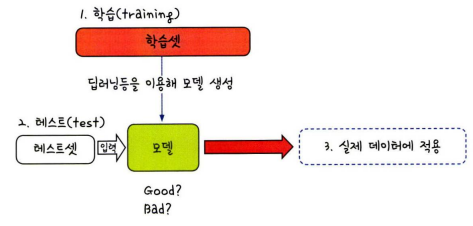

학습셋만 가지고 평가할 때, 층을 더하거나 에포크 값을 높여 실행 횟수를 늘리면 정확도가 계속해서 올라갈 수 있음. <br>
하지만 학습 데이터셋만으로 평가한 예측 성공률이 테스트셋에서도 그대로 나타나지는 않음

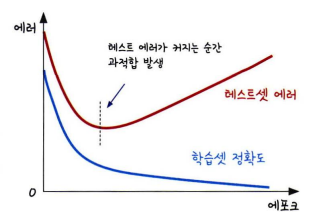

학습량이 늘어날수록 학습 데이터를 통한 예측률은 증가하지만, 테스트셋을 이용한 예측률은 오히려 감소함

테스트에 사용하게 하는 함수: sklearn 라이브러리의 train_test_split() 함수임

In [43]:
from sklearn.model_selection import train_test_split

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=seed)

In [45]:
model.fit(X_train,Y_train,epochs=50,batch_size=5) # 기존 epochs=130

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))

Epoch 1/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9931
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9862
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 11/50
29/29 [

### 초음파 광물 예측하기: 학습셋과 테스트셋 구분

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [46]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)
df=pd.read_csv('/content/sonar.csv', header=None)

dataset=df.values
X=dataset[:,0:60].astype(float)
Y_obj=dataset[:,60]

e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [47]:
# 학습셋과 테스트셋의 구분
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=seed)

model=Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=30, batch_size=5) # 기존 epochs=130

Epoch 1/30
29/29 [==============================] - 2s 4ms/step - loss: 0.2517 - accuracy: 0.5103
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.5724
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.6069
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2300 - accuracy: 0.6759
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.6966
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2189 - accuracy: 0.6828
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.6897
Epoch 8/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.7103
Epoch 9/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.6966
Epoch 10/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1998 - accuracy: 0.7172
Epoch 11/30
29/29 [

In [48]:
# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,Y_test)[1]))

2/2 [==============================] - 0s 10ms/step - loss: 0.1448 - accuracy: 0.7778

 Test Accuracy: 0.7778


## 4. 모델 저장과 재사용

In [22]:
from keras.models import load_model

model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model=load_model('my_model.h5')

### 초음파 광물 예측하기: 모델 저장과 재사용

In [24]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [49]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)
df=pd.read_csv('/content/sonar.csv', header=None)

dataset=df.values
X=dataset[:,0:60].astype(float)
Y_obj=dataset[:,60]

e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [50]:
# 학습셋과 테스트셋을 나눔
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=seed)

model=Sequential()
model.add(Dense(24,input_dim=60,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=30, batch_size=5) # 기존 epochs: 130
model.save('my_model.h5') # 모델을 컴퓨터에 저장

del model # 테스트를 위해 메모리 내의 모델을 삭제
model=load_model('my_model.h5') # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))

Epoch 1/30
29/29 [==============================] - 2s 5ms/step - loss: 0.2689 - accuracy: 0.4759
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.6069
Epoch 3/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2317 - accuracy: 0.6483
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.6897
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.7103
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2011 - accuracy: 0.7172
Epoch 7/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1926 - accuracy: 0.7448
Epoch 8/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.7793
Epoch 9/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1764 - accuracy: 0.7586
Epoch 10/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1734 - accuracy: 0.7655
Epoch 11/30
29/29 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 8ms/step - loss: 0.1457 - accuracy: 0.7778

 Test Accuracy: 0.7778


<hr>


## 5. k겹 교차 검증

k겹 교차 검증: 데이터셋을 여러 개로 나누어 하나씩 테스트셋으로 사용하고, 나머지를 모두 합해서 학습셋으로 사용하는 방법

데이터를 원하는 숫자만큼 쪼개 각각 학습셋과 테스트셋으로 사용되게 만드는 함수: <br>
sklearn의 StratifiedKFold() 함수

In [28]:
from sklearn.model_selection import StratifiedKFold

n_fold=10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [ ]:
for train, test in skf.split(X,Y):
  model=Sequential()
  model.add(Dense(24,input_dim=60,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
  model.fit(X[train],Y[train],epochs=10, batch_size=5) # 기존 epochs: 100

Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.5080
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.5936
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.5936
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.7166
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.7487
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.7594
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.7594
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.7594
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.7754
Epoch 10/10
38/38 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.7914
Epoch 1/10
38/38 [=

In [7]:
accuracy=[]

for train,test in skf.split(X,Y):
  # 중략
  k_accuracy="%.4f" %(model.evaluate(X[test],Y[test])[1])
  accuracy.append(k_accuracy)

print("\n %.f fold accuracy:"%n_fold,accuracy)

1/1 [==============================] - 0s 30ms/step - loss: 0.2342 - accuracy: 0.6000

 10 fold accuracy: ['0.5714', '0.5238', '0.5238', '0.5238', '0.5238', '0.5714', '0.5714', '0.6667', '0.5000', '0.6000']


### 초음파 광물 예측하기: k겹 교차 검증

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)
df=pd.read_csv('/content/sonar.csv', header=None)

dataset=df.values
X=dataset[:,0:60].astype(float)
Y_obj=dataset[:,60]

e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [5]:
# 10개의 파일로 쪼갬
n_fold=10
skf=StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy=[]

In [6]:
# 모델의 설정, 컴파일 실행
for train, test in skf.split(X,Y):
  model=Sequential()
  model.add(Dense(24,input_dim=60,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
  model.fit(X[train],Y[train],epochs=100, batch_size=5)
  k_accuracy="%.4f" %(model.evaluate(X[test],Y[test])[1])
  accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:"%n_fold,accuracy)

Epoch 1/100
38/38 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.5027
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.5455
Epoch 3/100
 1/38 [..............................] - ETA: 0s - loss: 0.2437 - accuracy: 0.4000

KeyboardInterrupt: 